<a href="https://colab.research.google.com/github/Deraxus/DATABASES_ICT_09.03.03_2024-2025/blob/main/Lab2Katkov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** изучение основных способов визуализации табличных данных с помощью модулей `seaborn`, `plotly`, `altair`, `bokeh`.

**Краткое описание:** в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля `seaborn` (альтернативно можно `matplotlib` со стилями из `seaborn`), второй – с помощью `plotly`, `altair` или `bokeh` на выбор студента. Необязательно каждый раз для второго графика выбирать одну и ту же библиотеку, т.к. не все библиотеки располагают одинаковым набором графиков.

# Данные


По [ссылке](https://drive.google.com/drive/folders/1e0E4vQzaE9LBZgfzz0AzsyAXgtH0eMaP?usp=share_link) расположена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы необходимо выполнять по этим данным. Данные в полном объеме можно найти [по ссылке](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).

##### **Формат данных**

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в фонале.

# Практические задания

>По каждому заданию должен быть сделан вывод. Также нужно обязательно добавлять подпись графика и осей.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('song_data.csv')

numeric_cols = ['BPM', 'energy', 'danceability', 'happiness',
                'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for col in numeric_cols:
    df[col] = df[col].replace('-', 0)
    df[col] = df[col].fillna(0)
    df[col] = df[col].astype(float)

df['loudness'] = df['loudness'].str.replace(' dB', '', regex=False)
df['loudness'] = df['loudness'].replace('-', 0)
df['loudness'] = df['loudness'].fillna(0).astype(float)

print(df[numeric_cols + ['loudness']].head())


     BPM  energy  danceability  happiness  acousticness  instrumentalness  \
0  110.0    36.0          64.0       23.0          58.0               0.0   
1  103.0    78.0          70.0       82.0           2.0               0.0   
2  103.0    70.0          56.0       11.0           4.0               2.0   
3  160.0    55.0          56.0       40.0           5.0               0.0   
4  145.0    63.0          66.0       77.0          31.0               0.0   

   liveness  speechiness  loudness  
0      10.0          3.0      10.0  
1      18.0          4.0       6.0  
2      32.0          5.0      10.0  
3       8.0          7.0       8.0  
4      16.0          5.0       8.0  


## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

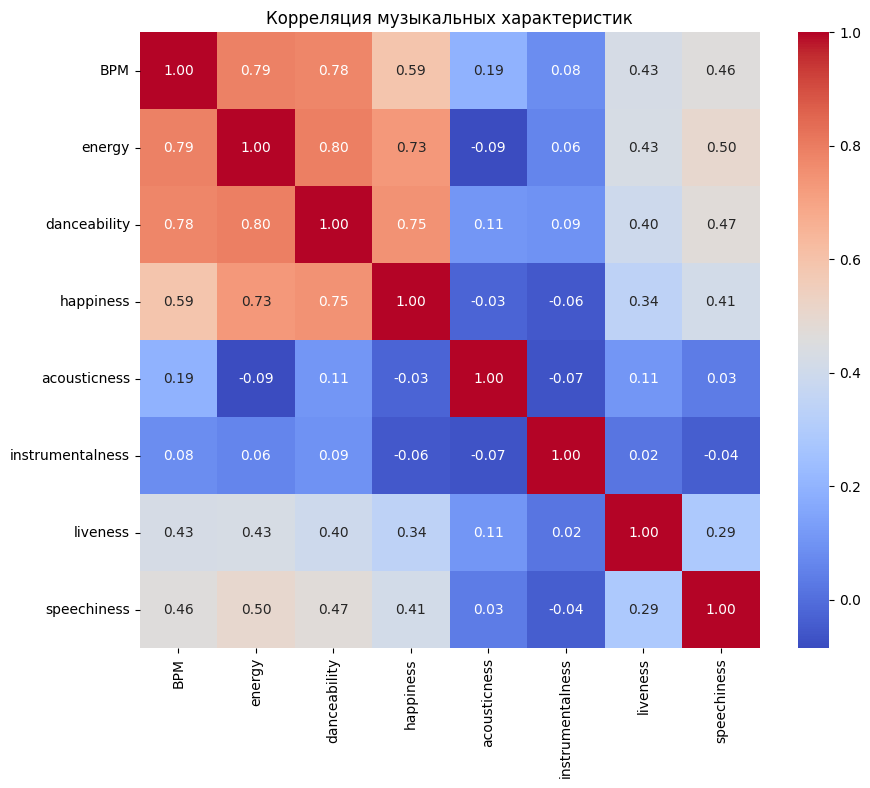

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_columns = ['BPM', 'energy', 'danceability', 'happiness',
                'acousticness', 'instrumentalness', 'liveness', 'speechiness']

corr_matrix = df[corr_columns].corr()

# --- 1. Matplotlib версия ---

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция музыкальных характеристик')
plt.show()

# --- 2. Plotly версия ---

import plotly.express as px

corr_columns = ['BPM', 'energy', 'danceability', 'happiness',
                'acousticness', 'instrumentalness', 'liveness', 'speechiness']
corr_matrix = df[corr_columns].corr()

fig = px.imshow(corr_matrix,
                text_auto='.2f',
                color_continuous_scale='RdBu',
                title='Корреляция музыкальных характеристик (Plotly)')

fig.show()



## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



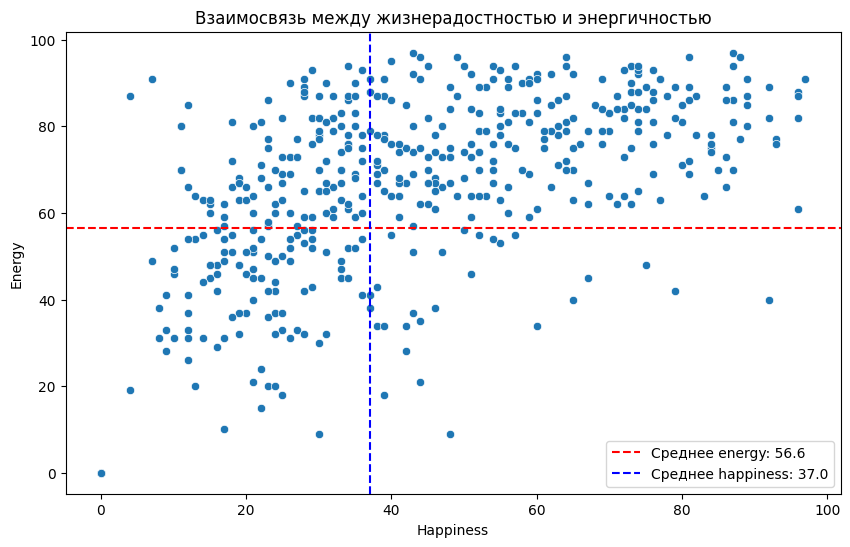

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_happiness = df['happiness'].mean()
mean_energy = df['energy'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='happiness', y='energy')

plt.axhline(mean_energy, color='red', linestyle='--', label=f'Среднее energy: {mean_energy:.1f}')
plt.axvline(mean_happiness, color='blue', linestyle='--', label=f'Среднее happiness: {mean_happiness:.1f}')

# --- 1. Matplotlib версия ---

plt.title('Взаимосвязь между жизнерадостностью и энергичностью')
plt.xlabel('Happiness')
plt.ylabel('Energy')
plt.legend()
plt.show()

import plotly.express as px
import plotly.graph_objects as go

# --- 2. Plotly версия ---

fig = px.scatter(df, x='happiness', y='energy',
                 title='Взаимосвязь между жизнерадостностью и энергичностью (Plotly)',
                 labels={'happiness': 'Happiness', 'energy': 'Energy'})

fig.add_shape(type="line", x0=mean_happiness, x1=mean_happiness, y0=0, y1=df['energy'].max(),
              line=dict(color="blue", dash="dash"), name="Среднее happiness")

fig.add_shape(type="line", x0=0, x1=df['happiness'].max(), y0=mean_energy, y1=mean_energy,
              line=dict(color="red", dash="dash"), name="Среднее energy")

fig.add_annotation(x=mean_happiness, y=df['energy'].max(),
                   text=f"Среднее happiness: {mean_happiness:.1f}",
                   showarrow=False, yshift=10, font=dict(color="blue"))

fig.add_annotation(x=df['happiness'].max(), y=mean_energy,
                   text=f"Среднее energy: {mean_energy:.1f}",
                   showarrow=False, xshift=-50, font=dict(color="red"))

fig.show()



## Задание 4

Покажите на горизонтальной столбчатой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

<ipython-input-7-1568116646>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




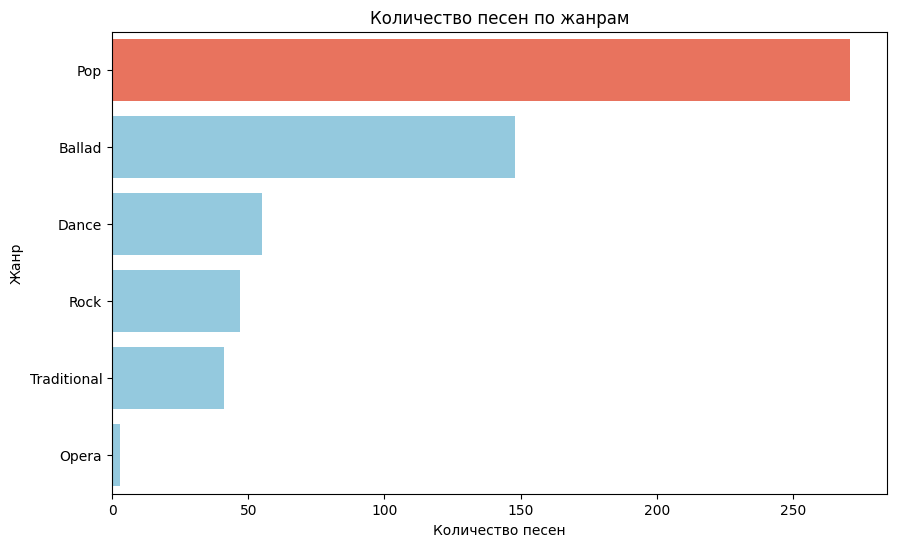

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

style_counts = df['style'].value_counts()

top_style = style_counts.index[0]

colors = ['tomato' if style == top_style else 'skyblue' for style in style_counts.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=style_counts.values, y=style_counts.index, palette=colors)

# --- 1. Matplotlib версия ---

plt.title('Количество песен по жанрам')
plt.xlabel('Количество песен')
plt.ylabel('Жанр')
plt.show()

# --- 2. Plotly версия ---
import plotly.express as px

style_counts = df['style'].value_counts().reset_index()
style_counts.columns = ['style', 'count']

top_style = style_counts.iloc[0]['style']
style_counts['color'] = style_counts['style'].apply(lambda x: 'tomato' if x == top_style else 'skyblue')


fig = px.bar(style_counts,
             x='count',
             y='style',
             orientation='h',
             color='color',
             color_discrete_map={'tomato': 'tomato', 'skyblue': 'skyblue'},
             title='Количество песен по жанрам (Plotly)',
             labels={'count':'Количество песен', 'style':'Жанр'})

fig.update_layout(showlegend=False)
fig.show()


## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

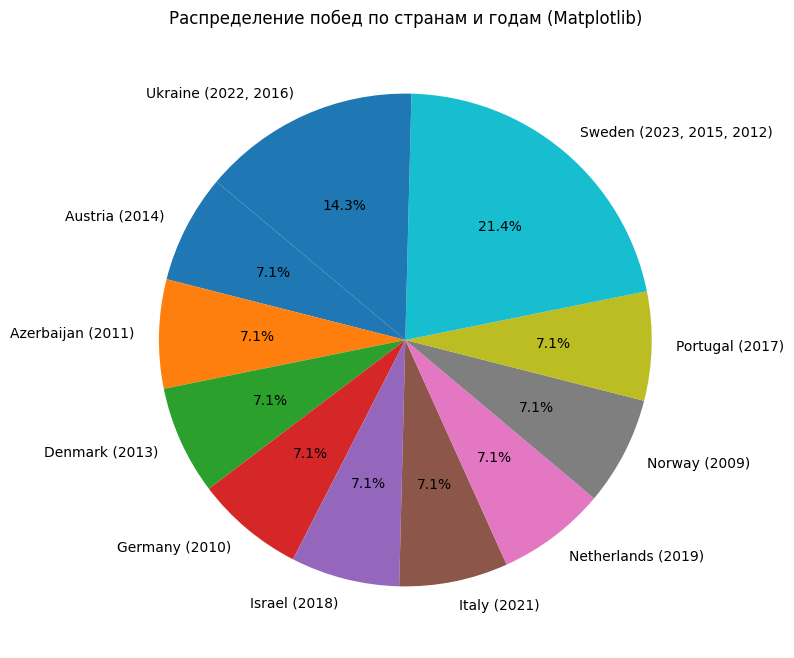

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

winners = df[df['final_place'] == 1]

country_years = winners.groupby('country')['year'].apply(list)

country_counts = country_years.apply(len)

winner_df = pd.DataFrame({
    'country': country_years.index,
    'count': country_counts.values,
    'years': country_years.values
})

winner_df['label'] = winner_df.apply(lambda row: f"{row['country']} ({', '.join(map(str, row['years']))})", axis=1)

# --- 1. Matplotlib версия ---
plt.figure(figsize=(8, 8))
plt.pie(winner_df['count'], labels=winner_df['label'], autopct='%1.1f%%', startangle=140)
plt.title('Распределение побед по странам и годам (Matplotlib)')
plt.show()

# --- 2. Plotly версия ---
fig = px.pie(winner_df,
              names='label',
              values='count',
              title='Распределение побед по странам и годам (Plotly)',
              hole=0.3)

fig.show()


## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

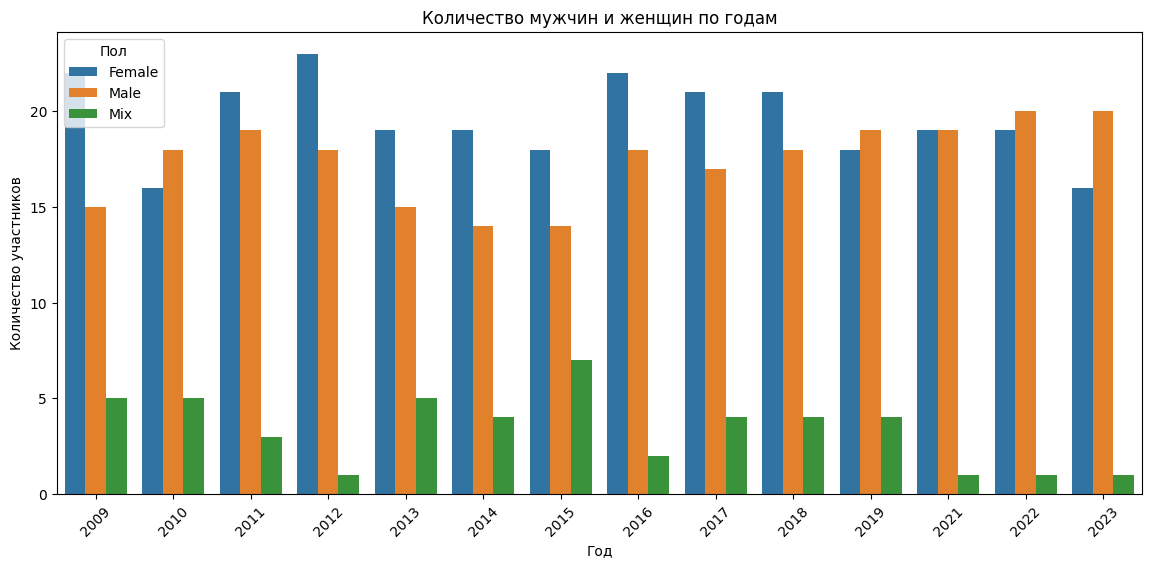

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

gender_year_counts = df.groupby(['year', 'gender']).size().reset_index(name='count')

# --- 1. Seaborn / Matplotlib версия ---
plt.figure(figsize=(14, 6))
sns.barplot(data=gender_year_counts, x='year', y='count', hue='gender')
plt.title('Количество мужчин и женщин по годам')
plt.xlabel('Год')
plt.ylabel('Количество участников')
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.show()

# --- 2. Plotly версия ---
fig = px.bar(gender_year_counts,
             x='year',
             y='count',
             color='gender',
             barmode='group',
             title='Количество мужчин и женщин по годам (Plotly)',
             labels={'count': 'Количество участников', 'year': 'Год', 'gender': 'Пол'})

fig.show()


## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

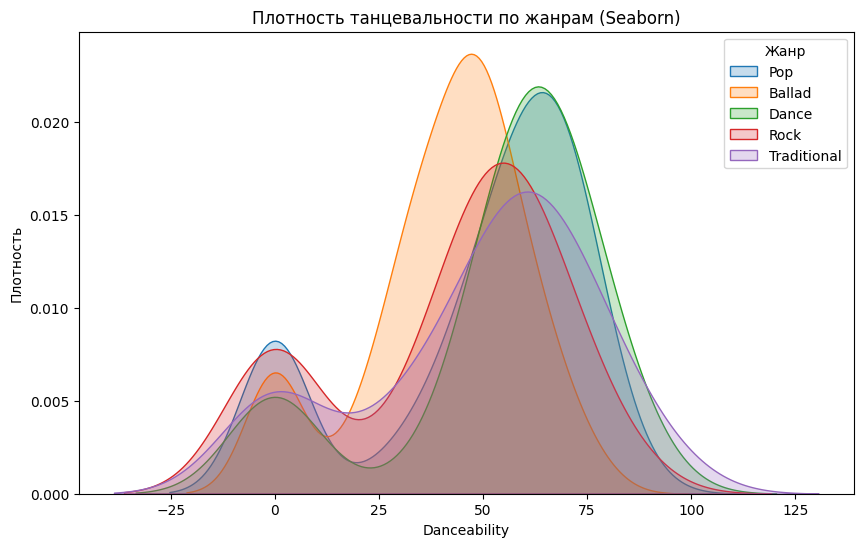

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

top_styles = df['style'].value_counts().index[:5]
filtered_df = df[df['style'].isin(top_styles)]

# --- 1. Seaborn версия ---
plt.figure(figsize=(10, 6))
for style in top_styles:
    sns.kdeplot(filtered_df[filtered_df['style'] == style]['danceability'], label=style, fill=True)

plt.title('Плотность танцевальности по жанрам (Seaborn)')
plt.xlabel('Danceability')
plt.ylabel('Плотность')
plt.legend(title='Жанр')
plt.show()

# --- 2. Plotly версия ---
fig = px.histogram(filtered_df,
                   x='danceability',
                   color='style',
                   histnorm='probability density',
                   barmode='overlay',
                   opacity=0.5,
                   nbins=30,
                   title='Плотность танцевальности по жанрам (Plotly)',
                   labels={'danceability':'Danceability', 'style':'Жанр'})

fig.show()


## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

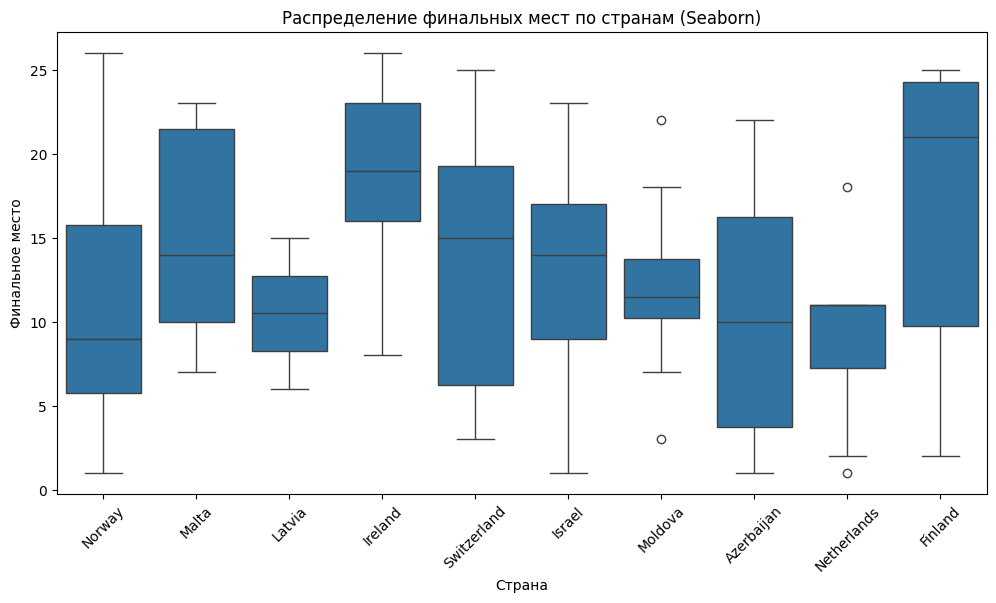

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

top_countries = df['country'].value_counts().index[:10]
filtered_df = df[df['country'].isin(top_countries)]

# --- 1. Seaborn версия ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='country', y='final_place')
plt.title('Распределение финальных мест по странам (Seaborn)')
plt.xlabel('Страна')
plt.ylabel('Финальное место')
plt.xticks(rotation=45)
plt.show()


# --- 2. Plotly версия ---
import plotly.express as px

fig = px.box(filtered_df,
             x='country',
             y='final_place',
             points='all',
             title='Распределение финальных мест по странам (Plotly)',
             labels={'final_place': 'Финальное место', 'country': 'Страна'})

fig.update_layout(xaxis_title='Страна', yaxis_title='Финальное место')
fig.show()



Вывод:

У стран Netherlands, Latvia и Moldova медианные места ниже, что говорит о более высоких позициях в финале. Switzerland, Norway и Azerbaijan показывают широкий разброс результатов - от первых мест до низких. У Ireland и Finland преобладают более низкие позиции в рейтинге.

## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

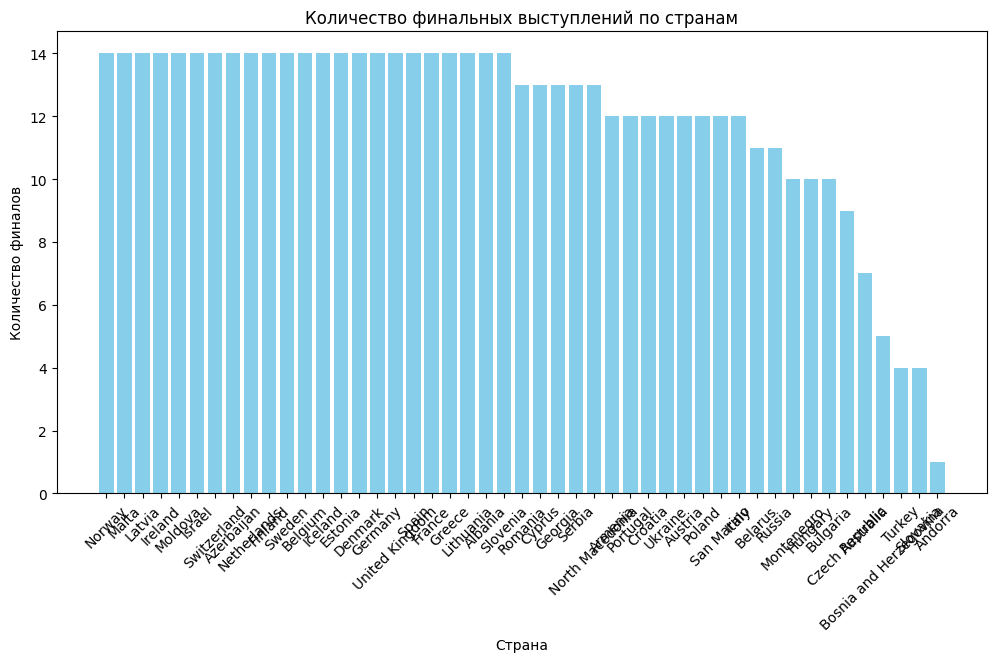

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Считаем количество раз, когда страны попадали в финал
final_counts = df['country'].value_counts().reset_index()
final_counts.columns = ['country', 'count']

# --- 1. Plotly версия ---

fig = px.choropleth(final_counts,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    color_continuous_scale='Blues',
                    title='Количество финальных выступлений по странам')

fig.show()

# --- 2. Matplotlib версия (барплот вместо карты) ---

final_counts_sorted = final_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(final_counts_sorted['country'], final_counts_sorted['count'], color='skyblue')
plt.title('Количество финальных выступлений по странам')
plt.xlabel('Страна')
plt.ylabel('Количество финалов')
plt.xticks(rotation=45)
plt.show()


## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

In [ ]:
import plotly.express as px

# Фильтруем только топ-3
top3_df = df[df['final_place'] <= 3]

top3_counts = top3_df['country'].value_counts().reset_index()
top3_counts.columns = ['country', 'count']

fig = px.treemap(top3_counts,
                 path=['country'],
                 values='count',
                 title='Количество попаданий в топ-3 по странам')

fig.show()


# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 10 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой построение визуализации по данным из лабораторной работы, по сложности аналогичной тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Покажите на ящиковой диаграмме распределение танцевальности для каждого жанра. Выполните с помощью `seaborn`.
2. На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью `plotly`.
3. Покажите на диаграмме вида `treemap`, сколько раз каждая страна проходила в финал. Выполните с помощью `plotly`.

# Дополнительные материалы

1. seaborn: statistical data visualization [Электронный ресурс]. URL: https://seaborn.pydata.org/ (дата обращения: 01.04.2024).
2. Plotly Open Source Graphing Libraries [Электронный ресурс]. URL: https://plotly.com/graphing-libraries/ (дата обращения: 01.04.2024).
3. Vega-Altair: Declarative Visualization in Python [Электронный ресурс]. URL: https://altair-viz.github.io/index.html (дата обращения: 01.04.2024).